<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/adding_C1/C1/W2/assignment/C1_W2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

We learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

**Things to Note:**
1. When coding the `class myCallback`, Python 3 will run into an error
```python
TypeError: '>' not supported between instances of 'NoneType' and 'float'
```
when using the code
```python
if(logs.get('accuracy')>0.99):
```

For Python 3, use the following equivalent code line

```python
if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
```

2. You can run the notebook using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [30]:
def train_mnist():
 
    # Define callbacks, it should stop training when reached 99% or greater accuracy
    
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True

    # Create an instance of myCallback function
    
    callbacks = myCallback()  

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    
    
    #normalize the images
    
    training_images = x_train / 255.0
    
    test_images = x_test / 255.0
    

    # Define the model
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax'),
    ])
    
    # Train the model

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(training_images, y_train, epochs = 10, callbacks = [callbacks])
    
    # Predict the images from the model which we have trained
    
    classification = model.predict(test_images)
    
    print('\n Probabilities of index 1 in predicted images \n', classification[1])
   
    # print the predicted label

    print('\nPredicted Label = ', y_test[1])
    
    # Show predicted number
    
    plt.imshow(test_images[1])
    
    return history.epoch, history.history['accuracy'][-1]

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2597 - accuracy: 0.9256
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1145 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0797 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0594 - accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0465 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0365 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9907

Reached 99% accuracy so cancelling training!

 Probabilities of index 1 in predicted images 
 [3.1822536e-09 1.6784588e-06 9.9999762e-01 2.5019830e-07 7.0533865e-15
 3.2666696e-07 3.0118763e-08 1.6966141e-15 9.8061875e-08 9.7914710e-13]

Predicted Label =  2


([0, 1, 2, 3, 4, 5, 6], 0.9907000064849854)

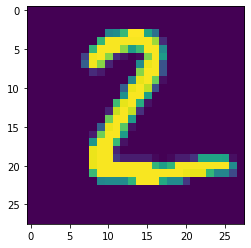

In [31]:
train_mnist()